<a href="https://colab.research.google.com/github/icemoney9908/Mon1234/blob/main/20230918(%EC%9B%941234_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

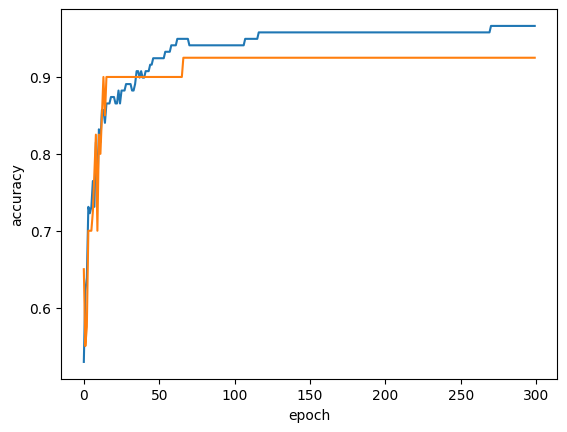

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


20230918  수업 실습

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

print(pd.unique(fish['Species']))
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

10 에포크만큼 훈련(max_iter = 10)

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


1 에포크씩 추가 훈련
fit는 기존 파라미터를 전부 날리고 다시 훈련
partial_fit는 남기고 추가로 훈련

In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


조기 종료


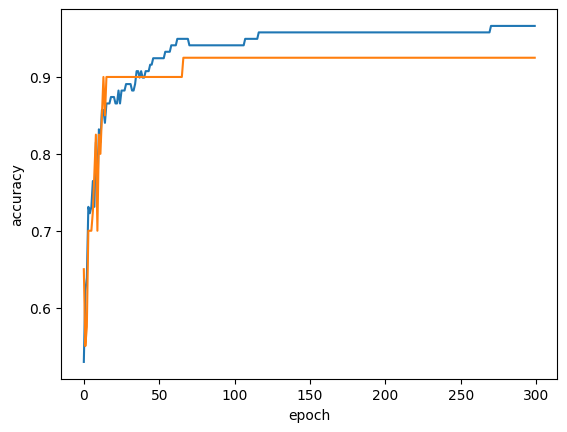

In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

위의 도표를 통해 100회 정도가 적당한 에포크로 판단하여 max_iter를 100으로 설정    
tol파라미터는 반복에 따른 변화가 적을 경우 조기 종료를 시키는 매개 변수, none으로 설정하면 중단없이 끝까지 반복

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


실습2

In [ ]:
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print(pd.unique(iris['Species']))

iris_input = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].to_numpy()
iris_target = iris['Species'].to_numpy()

['setosa' 'versicolor' 'virginica']


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target, stratify=iris_target, random_state=42)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

k-최근접 이웃 분류기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


In [ ]:
print(kn.classes_)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(kn.predict(test_scaled[:7]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor']


In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:7])
print(np.round(proba, decimals=4))

[[1.     0.     0.    ]
 [0.     0.6667 0.3333]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [1.     0.     0.    ]
 [0.     1.     0.    ]
 [0.     0.6667 0.3333]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['versicolor' 'versicolor' 'versicolor']]


로지스틱 회귀 다중 분류

In [ ]:
from sklearn.linear_model import LogisticRegression

lri = LogisticRegression(C=20, max_iter=1000)
lri.fit(train_scaled, train_target)

print(lri.score(train_scaled, train_target))
print(lri.score(test_scaled, test_target))

0.9821428571428571
0.9473684210526315


In [ ]:
print(lri.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [ ]:
proba = lri.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


In [ ]:
print(lri.classes_)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(lri.coef_, lri.intercept_)

print(lri.coef_.shape, lri.intercept_.shape)

[[-1.96375266  2.29862932 -3.60704918 -3.610392  ]
 [ 0.85564153 -0.49493044 -1.64408319 -1.67301749]
 [ 1.10811113 -1.80369888  5.25113237  5.28340949]] [ 0.69478349  4.4095301  -5.10431359]
(3, 4) (3,)


In [ ]:
decision = lri.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ 14.49   7.22 -21.71]
 [ -2.88   2.82   0.06]
 [ -1.46   3.99  -2.52]
 [ -3.4    4.44  -1.04]
 [ 13.45   7.44 -20.9 ]]


In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


확률적 경사 하강법

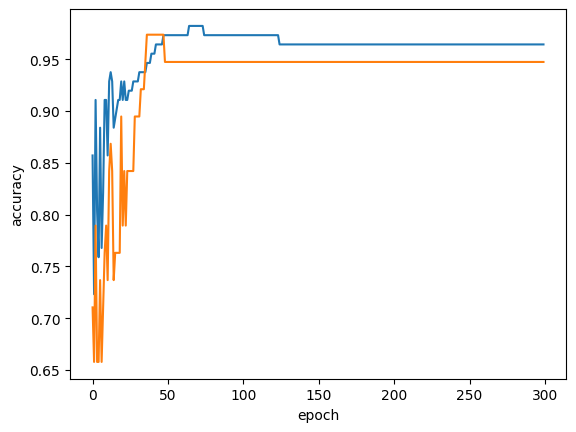

In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=40, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9642857142857143
0.9473684210526315


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=40, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


와인 데이터로 다시 해보기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

red_df = pd.read_csv('/content/winequality-red.csv', sep = ';', header = 0, engine = 'python')
white_df = pd.read_csv('/content/winequality-white.csv', sep = ';', header = 0, engine = 'python')
red_df.to_csv('/content/winequality-red2.csv',index = False)
white_df.to_csv('/content/winequality-white2.csv', index = False)


In [6]:
red_df.insert(0, column = 'type', value = 'red')
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
white_df.insert(0, column = 'type', value = 'white')
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
wine = pd.concat([red_df, white_df])
wine.to_csv('/content/wine.csv', index = False)

In [10]:
print(pd.unique(wine['type']))

wine_input = wine[['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].to_numpy()
wine_target = wine['type'].to_numpy()

['red' 'white']


In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(wine_input, wine_target, random_state=42)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

k-최근접 이웃 분류기

In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9971264367816092
0.9895384615384616


In [14]:
print(kn.classes_)

['red' 'white']


In [15]:
print(kn.predict(test_scaled[:7]))

['white' 'red' 'white' 'white' 'white' 'red' 'white']


In [17]:
import numpy as np

proba = kn.predict_proba(test_scaled[:7])
print(np.round(proba, decimals=4))

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [18]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['white' 'white' 'white']]


로지스틱 회귀 다중 분류

In [19]:
from sklearn.linear_model import LogisticRegression

lri = LogisticRegression(C=20, max_iter=1000)
lri.fit(train_scaled, train_target)

print(lri.score(train_scaled, train_target))
print(lri.score(test_scaled, test_target))

0.9940476190476191
0.9913846153846154


In [20]:
print(lri.predict(test_scaled[:5]))

['white' 'red' 'white' 'white' 'white']


In [21]:
proba = lri.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    1.   ]
 [0.798 0.202]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]]


In [22]:
print(lri.classes_)

['red' 'white']


In [23]:
print(lri.coef_, lri.intercept_)

print(lri.coef_.shape, lri.intercept_.shape)

[[-0.28359234 -1.58710482  0.28548225  4.77375915 -0.7998967  -1.26190834
   3.15180082 -4.37761324 -0.06322565 -0.63986313 -1.44409315 -0.33901997]] [4.83797359]
(1, 12) (1,)


In [24]:
decision = lri.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[14.37 -1.38  9.47 13.   12.82]


확률적 경사 하강법

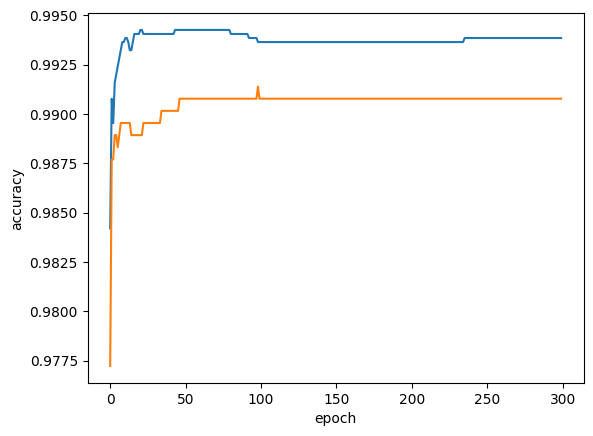

In [26]:
import numpy as np
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [28]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9948686371100164
0.9901538461538462


In [29]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9956896551724138
0.9926153846153846
